In [53]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
from sklearn.svm import  SVC
import numpy as np
from sklearn.metrics import accuracy_score

In [54]:
#using my group's dataset
data = pd.read_csv("HorrorMissingCleaned.csv")
data.info()

data["Rating_class"] = np.where(data["Rating"] > 4.0, 'good', 'mid')
data.info()

#using iloc and loc on the dataset that we want to utilize
X = data.iloc[0:1150, 2:4]
y = data.loc[0:1150, 'Rating_class']

#SVM TESTING LOGS
#LINEAR KERNEL
# svm = SVC(kernel = 'linear', random_state=1, gamma=0.05, C = 1) #Accuracy score : 72% or 0.72
# svm = SVC(kernel = 'linear', random_state=1, gamma=0.000001, C = 100) #Accuracy score : 72% or 0.72
# svm = SVC(kernel = 'linear', random_state=1, gamma=10, C = 100) #Accuracy score : 72% or 0.72

#RBF KERNEL
# svm = SVC(kernel = 'rbf', random_state=1, gamma=0.05, C = 1) #Accuracy score : 92% or 0.92
# svm = SVC(kernel = 'rbf', random_state=1, gamma=0.000001, C = 100) #Accuracy score : 60% or 0.6
svm = SVC(kernel = 'rbf', random_state=1, gamma=10, C = 1) #Accuracy score : 100% or 1.0 ==============> currently the best setting 



svm.fit(X,y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   1150 non-null   object 
 1   Author  1150 non-null   object 
 2   Year    1150 non-null   int64  
 3   Rating  1150 non-null   float64
 4   Raters  1150 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 45.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1150 non-null   object 
 1   Author        1150 non-null   object 
 2   Year          1150 non-null   int64  
 3   Rating        1150 non-null   float64
 4   Raters        1150 non-null   int64  
 5   Rating_class  1150 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 54.0+ KB


SVC(C=1, gamma=1000, random_state=1)

### Notes
For this assignment, I tried around a few different svm kernel, gamma, and C settings. <br>
<br>
First I tried changing the gamma and C settings with the **linear kernel**. Interestingly, after changing the settings 3 different times as (gamma = 0.05, C = 1), (gamma = 0.000001, C = 100), and (gamma = 10, C = 1), the accuracy score of all the different test settings came out the same, 0.72 or 72%. With this I conclude that when using the linear kernel, the gamma and C values does not have a big effect on the accuracy score. Another thing to note is that the linear kernel might not be the best kernel to use, as it has an average to low accuracy score of 72%, therefore the predictions of this svm setting is probably not the most accurate. <br>
<br>
For the second type of kernel, I tried using the **RBF kernel**. Different with the linear kernel, the RBF kernel's accuracy score is affected significantly by the gamma and C values. After changing the settings 3 different times as (gamma = 0.05, C = 1), (gamma = 0.000001, C = 100), and (gamma = 10, C = 1), the accuracy scores all differ where the setting of (gamma = 0.05, C = 1) has the accuracy score of 92% or 0.92, (gamma = 0.000001, C = 100) has the accuracy score of 60% or 0.6, and (gamma = 10, C = 1) has the **highest accuracy score** reaching 1.0 or approximately 100%. <br>
<br>
### Conclusion 
* With that being said, for this dataset, using the RBF kernel allows us to try different settings and its effectivity on the accuracy score, making it more comparable to each other and allows room for experiments. Comparatively, the linear kernel used on this dataset is consistent, and is perhaps independent to the gamma and C values as it has little to no effect on the final accuracy scores. 
* When tried with the value of (gamma = 0.05, C = 1),, the RBF kernel (92%) performed significantly better in terms of accuracy score compared to the linear kernel (72%).
* When tried with the value of (gamma = 0.000001, C = 100), the RBF kernel (60%) performed worse in terms of accuracy score compared to the linear kernel (72%).
* When tried with the value of (gamma = 10, C = 1) , the RBF kernel (100%) performed significantly better in terms of accuracy score compared to the linear kernel (72%).
* The best setting out of all the tried gamma and C values combination is kernel = 'rbf', random_state=1, gamma=10, C = 1, with the accuracy score of 1.0 or 100%
* The worst setting out of all the tried gamma and C values combination is kernel = 'rbf', random_state=1, gamma=0.000001, C = 100, with the accuracy score of 0.6 or 60%
* Overall, on this dataset, if looking for a consistent accuracy score, use the linear kernel svm, else if trying to experiment/find the most accurate prediction/accuracy score trial and error with the rbf kernel.

In [55]:
#the prediction and accuracy score
y_pred = svm.predict(X)
print("Accuracy score: " + str(accuracy_score(y, y_pred)))

Accuracy score: 1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1150 non-null   object 
 1   Author        1150 non-null   object 
 2   Year          1150 non-null   int64  
 3   Rating        1150 non-null   float64
 4   Raters        1150 non-null   int64  
 5   Rating_class  1150 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 54.0+ KB
0


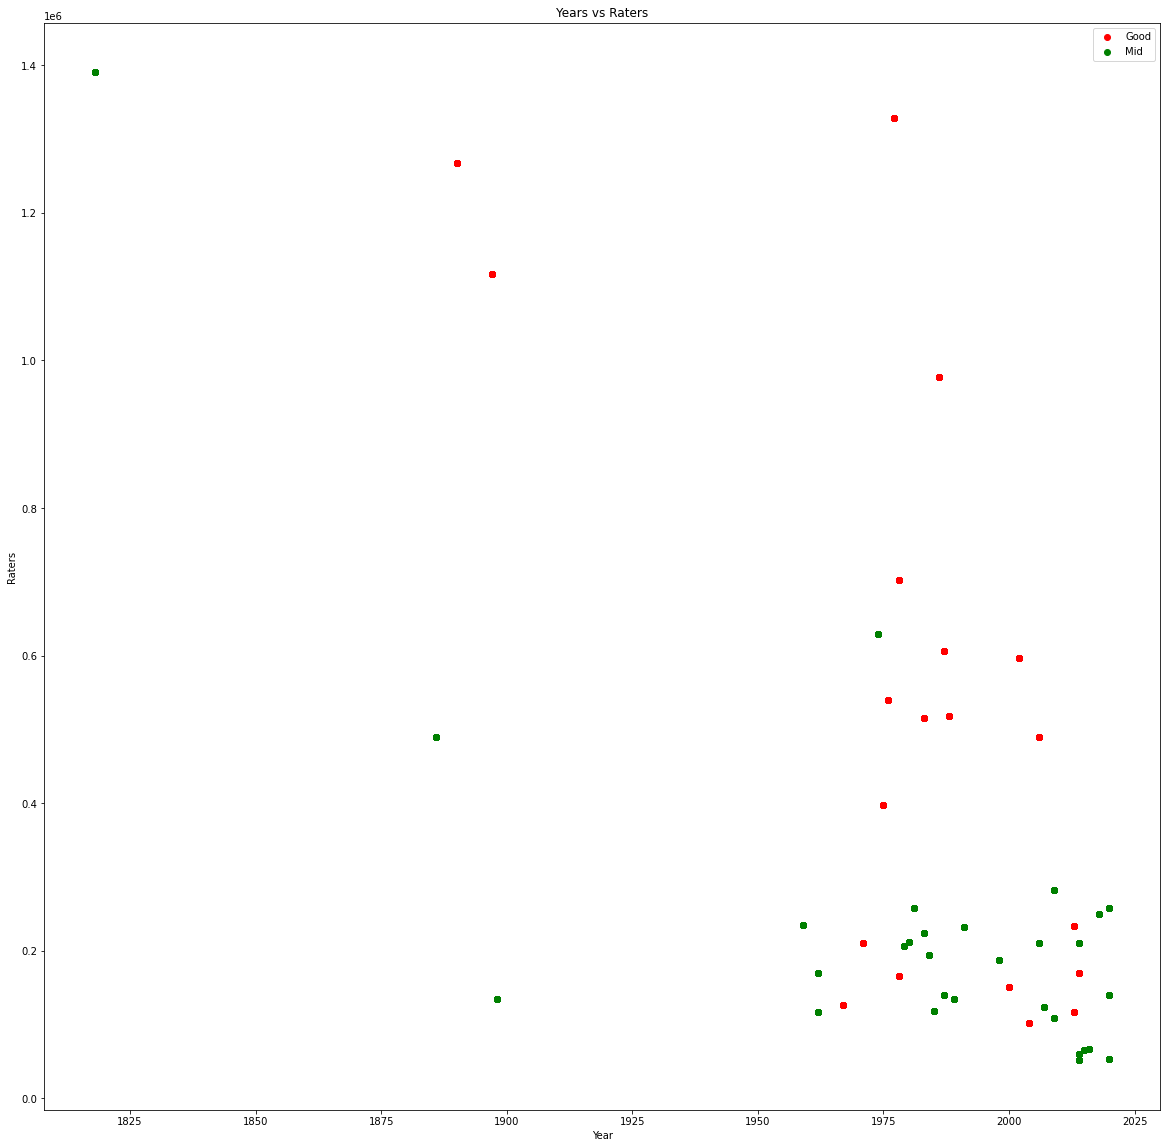

In [56]:
#the plotting/visualizing the plot
data.info()

fig, ax = plt.subplots(figsize=(20,20))

x = data[["Year", "Rating_class"]]
y = data[["Raters", "Rating_class"]]
z = data["Rating_class"]

ax.scatter(x[x["Rating_class"]== "good"]["Year"], y[y["Rating_class"]== "good"]["Raters"], color = "red", label = "Good")
ax.scatter(x[x["Rating_class"]== "mid"]["Year"], y[y["Rating_class"]== "mid"]["Raters"], color = "green", label = "Mid")
ax.legend()

print(len(data[data['Title'] == "Missing"]))
pd.DataFrame.dropna

ax.set_xlabel('Year')
ax.set_ylabel('Raters')
ax.set_title('Years vs Raters')

plt.show()

In [57]:
data.to_csv("HorrorSVM.csv", index = False)
